<a href="https://colab.research.google.com/github/marcusguerra/Twitter_Scraper/blob/master/dataShow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import urllib.request
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
!wget https://github.com/marcusguerra/Twitter_Scraper/raw/master/dados.csv

--2023-07-06 22:39:15--  https://github.com/marcusguerra/Twitter_Scraper/raw/master/dados.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/marcusguerra/Twitter_Scraper/master/dados.csv [following]
--2023-07-06 22:39:16--  https://raw.githubusercontent.com/marcusguerra/Twitter_Scraper/master/dados.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69098525 (66M) [text/plain]
Saving to: ‘dados.csv’

dados.csv           100%[===================>]  65.90M   133MB/s    in 0.5s    

2023-07-06 22:39:19 (133 MB/s) - ‘dados.csv’ saved [69098525/69098525]



In [37]:
df = pd.read_csv('dados.csv', delimiter=',')

In [38]:
def mostraImagem(link, imagem):
  image_url = link
  image_path = imagem
  urllib.request.urlretrieve(image_url, image_path)
  image = plt.imread(image_path)
  plt.figure(figsize=(10, 10))
  plt.imshow(image)
  plt.axis('off')
  plt.show()

In [44]:
def plotDay(df):
  tweets_per_day = df.groupby(df['dateTime'].dt.date).size()

  tweets_per_day = tweets_per_day[tweets_per_day.index <= pd.to_datetime('2023-06-30')]

  plt.figure(figsize=(10, 5))
  tweets_per_day.plot(kind='line')
  plt.xlabel('Date')
  plt.ylabel('Number of Tweets')
  plt.title('Number of Tweets per Day')
  plt.show()

In [39]:
print(df.columns)

Index(['tweet', 'dateTime', 'keyWord'], dtype='object')


#Limpeza

In [40]:
df.dropna()
df['tweet'] = df['tweet'].str.replace('milhoe', 'milhões')

In [41]:
#Data Frames:
df['dateTime'] = pd.to_datetime(df['dateTime'])

In [52]:
dfMst = df[df["keyWord"] == "mst"]
dfAmazonia = df[df["keyWord"] == "amazonia"]
dfIncra = df[df["keyWord"] == "incra"]
dfBoiada = df[df["keyWord"] == "boiada"]

##Total de cada palavra


In [63]:
print(len(df['keyWord'].unique()))
print(df['keyWord'].unique())

43
['agronegocio' 'Sustentabilidade' 'Desenvolvimento Sustentavel'
 'Florestal Amazonica' 'pantanal' 'terra indigena' 'reserva indigena'
 'mtst' 'marco temporal' 'garimpo' 'desmatamento' 'ibama' 'agrotoxico' nan
 'meio ambiente' 'queimadas' 'reforma agraria' 'mst' 'boiada'
 'latifundiario' 'agropecuaria' 'amazonia' 'garimpeiros' 'ruralistas'
 'ministerio do meio ambiente' 'indigenista' 'agricultura' 'quilombolas'
 'biodiversidade' 'recursos naturais' 'mudancas climaticas' 'mineracao'
 'agricultor' 'mata atlantica' 'marina silva' '@marinasilva' 'latifundio'
 'incra' 'energia limpa' 'pecuaria' 'povos originarios'
 'territorio indigena' 'desenvolvimento sustentavel']


In [8]:
keyword_counts = df['keyWord'].value_counts()
print(keyword_counts)
print("total = ", keyword_counts.sum())

mst                            81330
amazonia                       57922
boiada                         28734
incra                          26983
agricultura                    26791
queimadas                      19300
povos originarios              14275
marco temporal                 13001
agricultor                      9596
biodiversidade                  8485
meio ambiente                   6488
latifundiario                   5568
desenvolvimento sustentavel     4949
indigenista                     2385
territorio indigena             1212
mudancas climaticas              883
mata atlantica                   804
agropecuaria                     712
pecuaria                         655
ibama                            654
garimpeiros                      646
mineracao                        626
Sustentabilidade                 584
ministerio do meio ambiente      438
energia limpa                    429
ruralistas                       408
garimpo                          398
p

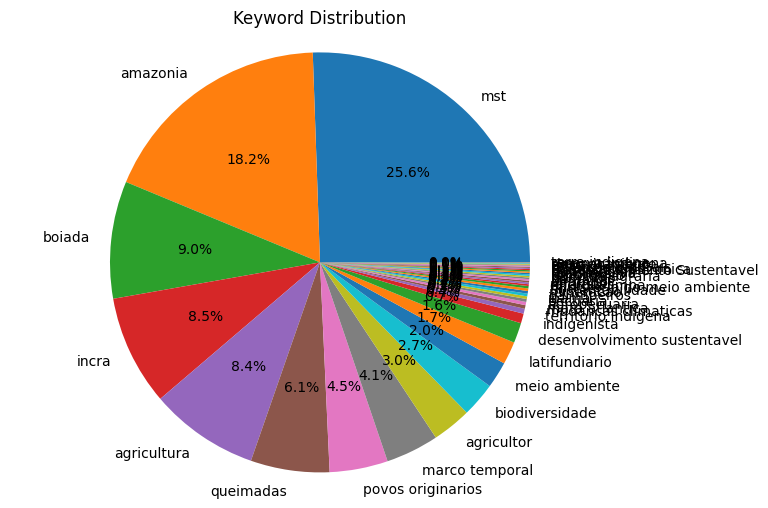

In [68]:
plt.figure(figsize=(8, 6))
plt.pie(keyword_counts, labels=keyword_counts.index, autopct='%1.1f%%')
plt.title('Keyword Distribution')
plt.axis('equal')
plt.show()

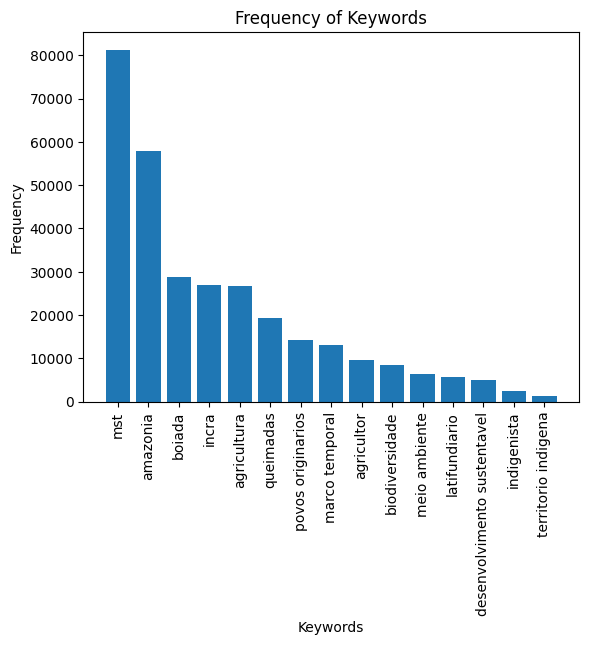

In [9]:
keywords = df['keyWord']

keyword_counts = keywords.value_counts()
keyword_counts = keyword_counts[0:15]
plt.bar(keyword_counts.index, keyword_counts.values)
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

##Nuvem de Palavras

In [57]:
print(df['keyWord'].unique())

['agronegocio' 'Sustentabilidade' 'Desenvolvimento Sustentavel'
 'Florestal Amazonica' 'pantanal' 'terra indigena' 'reserva indigena'
 'mtst' 'marco temporal' 'garimpo' 'desmatamento' 'ibama' 'agrotoxico' nan
 'meio ambiente' 'queimadas' 'reforma agraria' 'mst' 'boiada'
 'latifundiario' 'agropecuaria' 'amazonia' 'garimpeiros' 'ruralistas'
 'ministerio do meio ambiente' 'indigenista' 'agricultura' 'quilombolas'
 'biodiversidade' 'recursos naturais' 'mudancas climaticas' 'mineracao'
 'agricultor' 'mata atlantica' 'marina silva' '@marinasilva' 'latifundio'
 'incra' 'energia limpa' 'pecuaria' 'povos originarios'
 'territorio indigena' 'desenvolvimento sustentavel']


In [67]:
stop_words = set(stopwords.words('portuguese'))
stop_words.update(["vc", "nao", "ate", "nada", "SO", "q", "pq", "ne", "ta", "pro","pra", "ja", "ai", "ter","faz", "sim", "deu", "quer","la", "vai", "vcs",
                   "sao", "n", "bem", "disse", "fez", "fazem", "youtu be", "p", "todo", "toda", "entao", "ver", "https youtu", "deveria", "mensagens", "deve", "parte",
                   "outro", "pois", "tudo", "cara", "voce","enquanto", "Brasil", "todos", "sobre", "agora", "pode"])

additional_stop_words = [
    'agronegocio', 'Sustentabilidade', 'Desenvolvimento Sustentavel', 'Florestal Amazonica',
    'pantanal', 'terra indigena', 'reserva indigena', 'mtst', 'marco temporal', 'garimpo',
    'desmatamento', 'ibama', 'agrotoxico', 'nan', 'meio ambiente', 'queimadas', 'reforma agraria',
    'mst', 'boiada', 'latifundiario', 'agropecuaria', 'amazonia', 'garimpeiros', 'ruralistas',
    'ministerio do meio ambiente', 'indigenista', 'agricultura', 'quilombolas', 'biodiversidade',
    'recursos naturais', 'mudancas climaticas', 'mineracao', 'agricultor', 'mata atlantica',
    'marina silva', '@marinasilva', 'latifundio', 'incra', 'energia limpa', 'pecuaria',
    'povos originarios', 'territorio indigena', 'desenvolvimento sustentavel','meio ambiente'
]
stop_words.update(additional_stop_words)

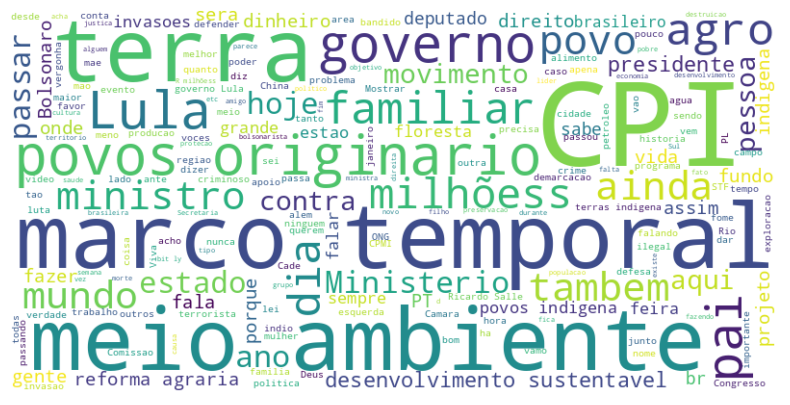

In [68]:
text = ' '.join(df["tweet"].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<ipython-input-44-6d8405a2dcb1>:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  tweets_per_day = tweets_per_day[tweets_per_day.index <= pd.to_datetime('2023-06-30')]


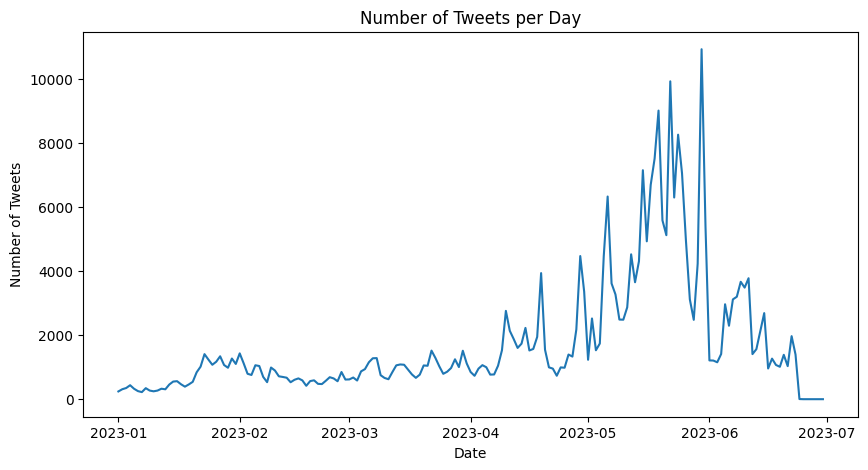

In [69]:
plotDay(df)

###MST

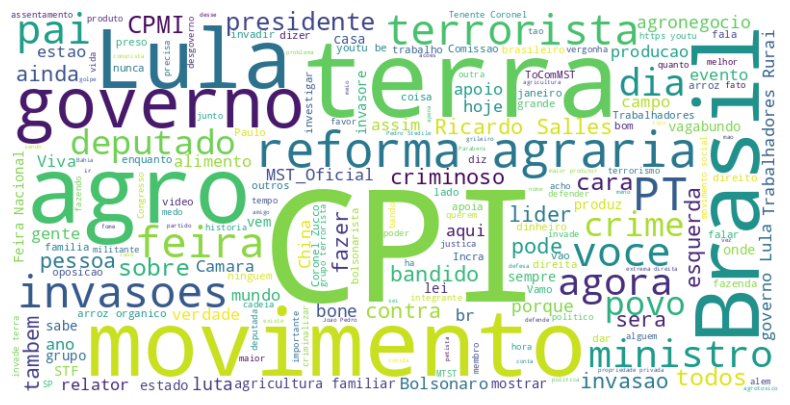

In [50]:
text = ' '.join(dfMst["tweet"].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<ipython-input-44-6d8405a2dcb1>:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  tweets_per_day = tweets_per_day[tweets_per_day.index <= pd.to_datetime('2023-06-30')]


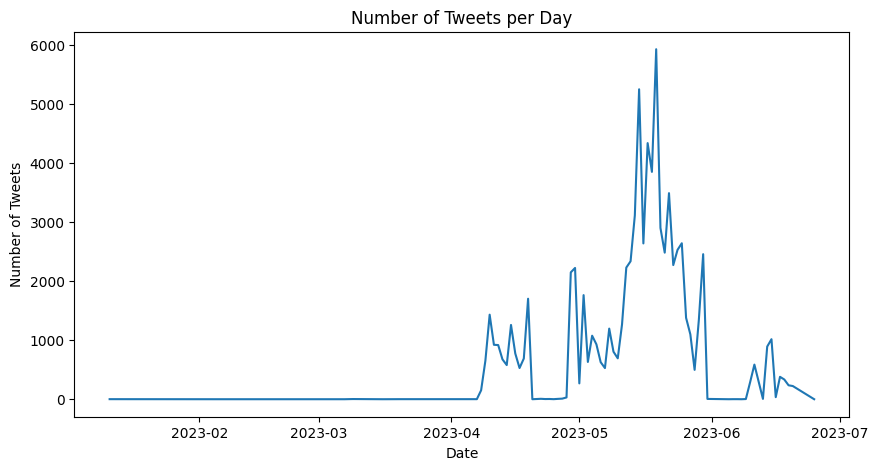

In [45]:
plotDay(dfMst)

###Amazonia

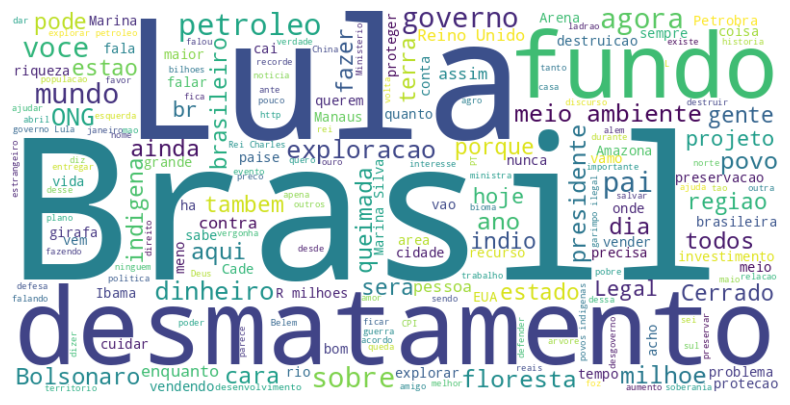

In [52]:
textAmazonia = ' '.join(dfAmazonia["tweet"].dropna().astype(str).tolist())
stop_words.update("Amazonia")
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(textAmazonia)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
stop_words.discard("amazonia")

<ipython-input-44-6d8405a2dcb1>:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  tweets_per_day = tweets_per_day[tweets_per_day.index <= pd.to_datetime('2023-06-30')]


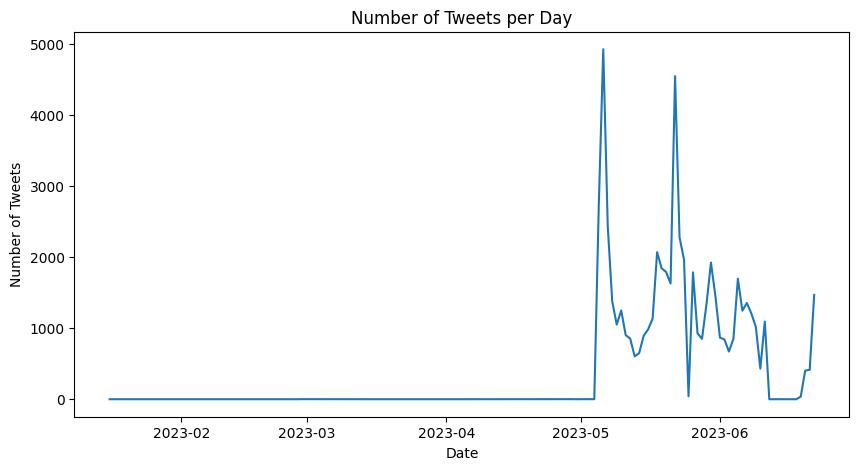

In [46]:
plotDay(dfAmazonia)

###Boiada

28734


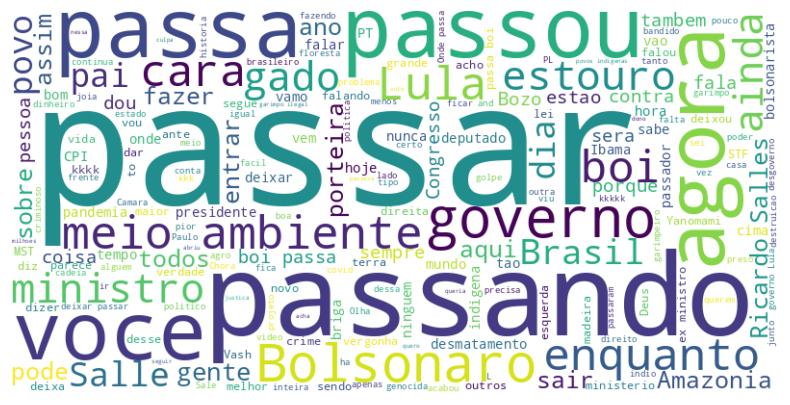

In [57]:
text = ' '.join(dfboaida["tweet"].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

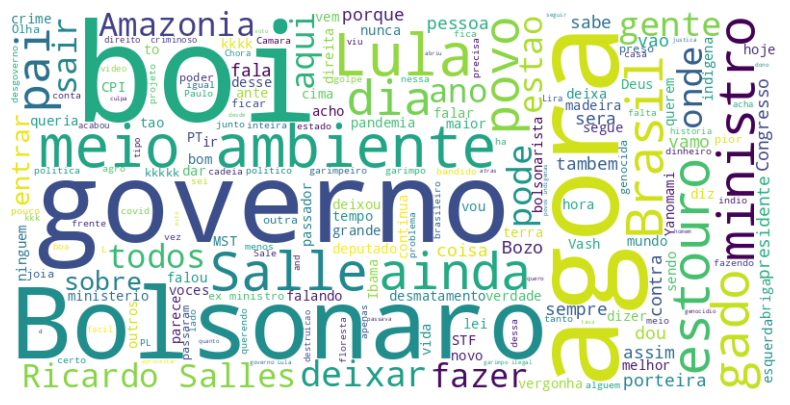

In [79]:
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<ipython-input-44-6d8405a2dcb1>:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  tweets_per_day = tweets_per_day[tweets_per_day.index <= pd.to_datetime('2023-06-30')]


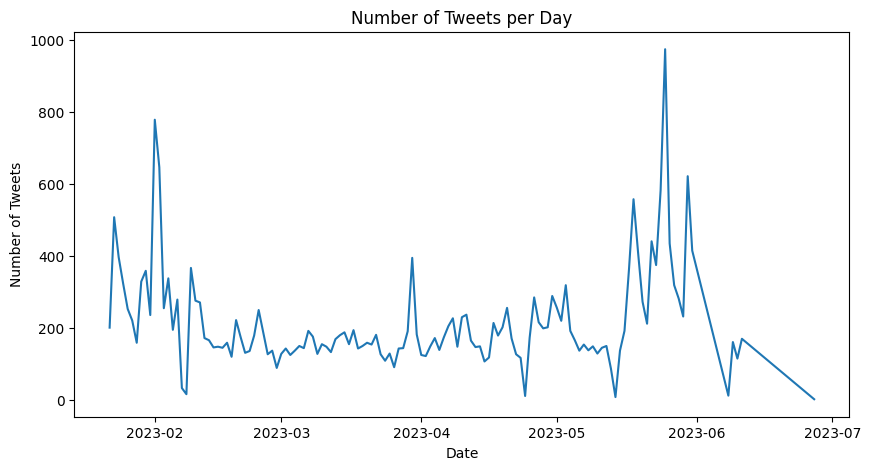

In [55]:
plotDay(dfBoiada)

###Incra

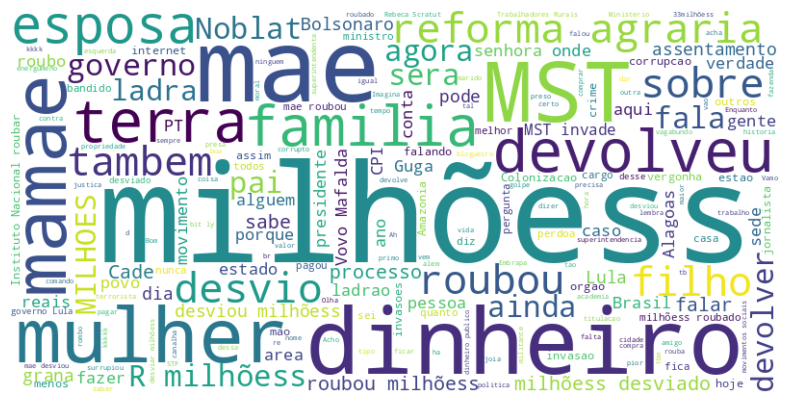

In [75]:
text = ' '.join(dfIncra["tweet"].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<ipython-input-44-6d8405a2dcb1>:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  tweets_per_day = tweets_per_day[tweets_per_day.index <= pd.to_datetime('2023-06-30')]


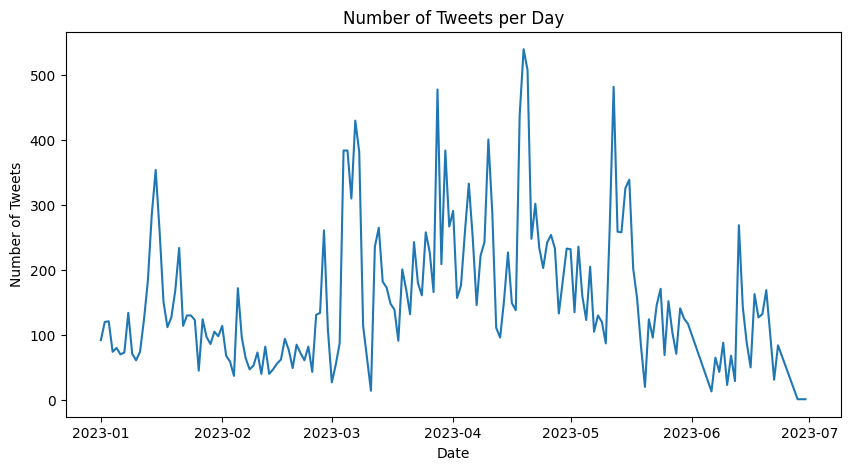

In [56]:
plotDay(dfIncra)

#Tratamento dos Tweets:
##como os tweets ficam

###Lixos

Qualquer lixo como: Imagens, Em resposta a, Comentar o Tweet, Foto quadrada do perfil , assim como o Nome do Usuário e seu @, são removidos.

###Tweets que não tem a palavra chave
A função de busca do twitter capta a palavra chave no nome de usuário da pessoa, assim como no @, o que não é relevante para os dados, logo eles são excluidos

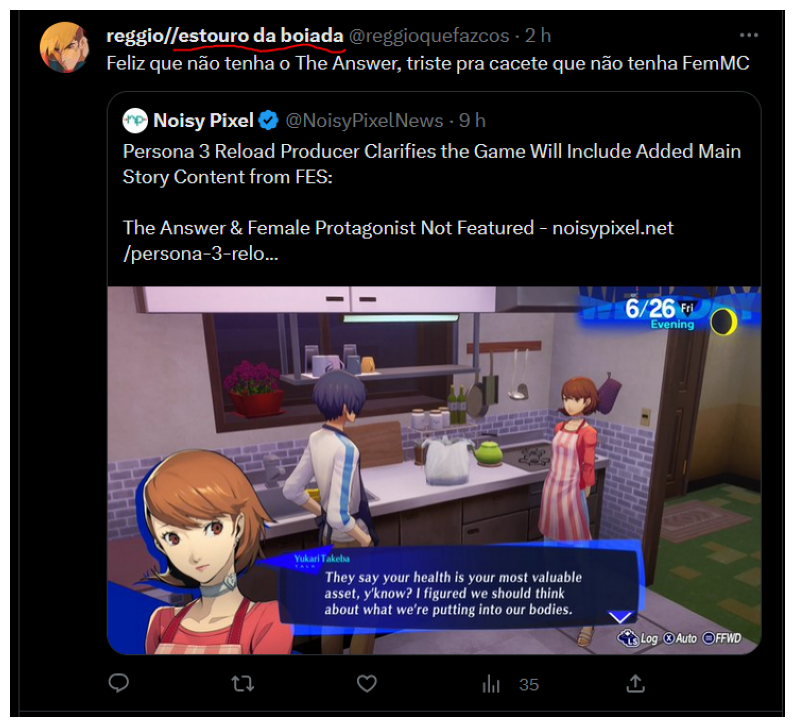

In [ ]:
mostraImagem("https://github.com/marcusguerra/Twitter_Scraper/raw/master/imagens/Ex6.PNG", "Ex6.PNG")

###Tweets Repetidos/bots/spam
o algoritmo tenta dar uma filtrada em spans/bots excluindo mensagens exatamente iguais, contudo ainda passam alguns spans que tem leves diferenças, existem outras 75 mensagens quase identicas a essas de baixo

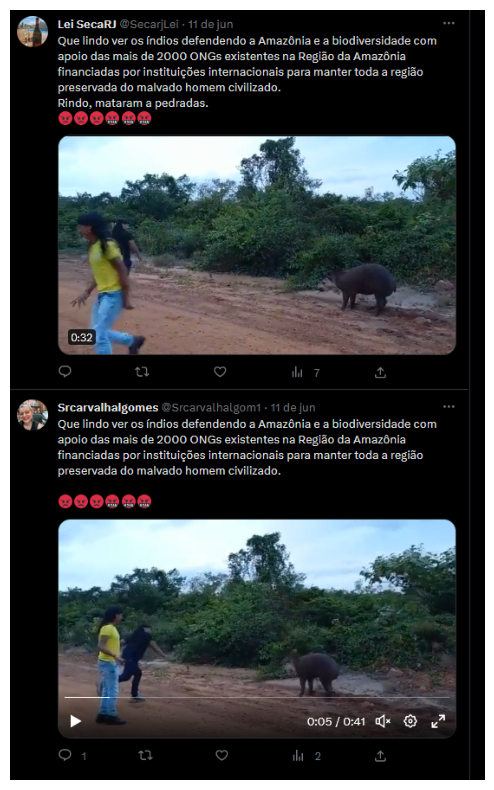

In [ ]:
mostraImagem("https://github.com/marcusguerra/Twitter_Scraper/raw/master/imagens/Ex7.PNG", "Ex7.PNG")